# Loan Approval Campaign Case Study
## Logistic Regression Modelling
>### Author: Lu (Christina) Jin

# Setup: Import all libraries

In [16]:
import os
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as pltimg
import scipy as scipy

import statsmodels.api as sm       
from statsmodels.formula.api import ols, logit

import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
from math import sqrt
from matplotlib.ticker import PercentFormatter
from scipy import stats
import statsmodels.api as smf
from statsmodels.formula.api import ols, logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from pylab import rcParams
rcParams['figure.figsize'] = (20, 10)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

# Acquiring Dataset 

In [17]:
# Read data
loan_df = pd.read_excel (r'C:\Users\Lu_ki\OneDrive - Northeastern University\Data Analytics Case Study Projects\Jupyter Notebook\Data Input\Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

len(loan_df)
loan_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Basic Data Manipulation 

In [18]:
loan_df.columns =['ID', 'Age','Experience','Income','ZIP_Code','Family','CCAvg','Education','Mortgage','Personal_Loan','Securities_Account','CD_Account','Online','Credit_Card']

In [19]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  Credit_Card         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [151]:
loan_df.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,Credit_Card
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Checking Correlation Between Each Predictor and the Target

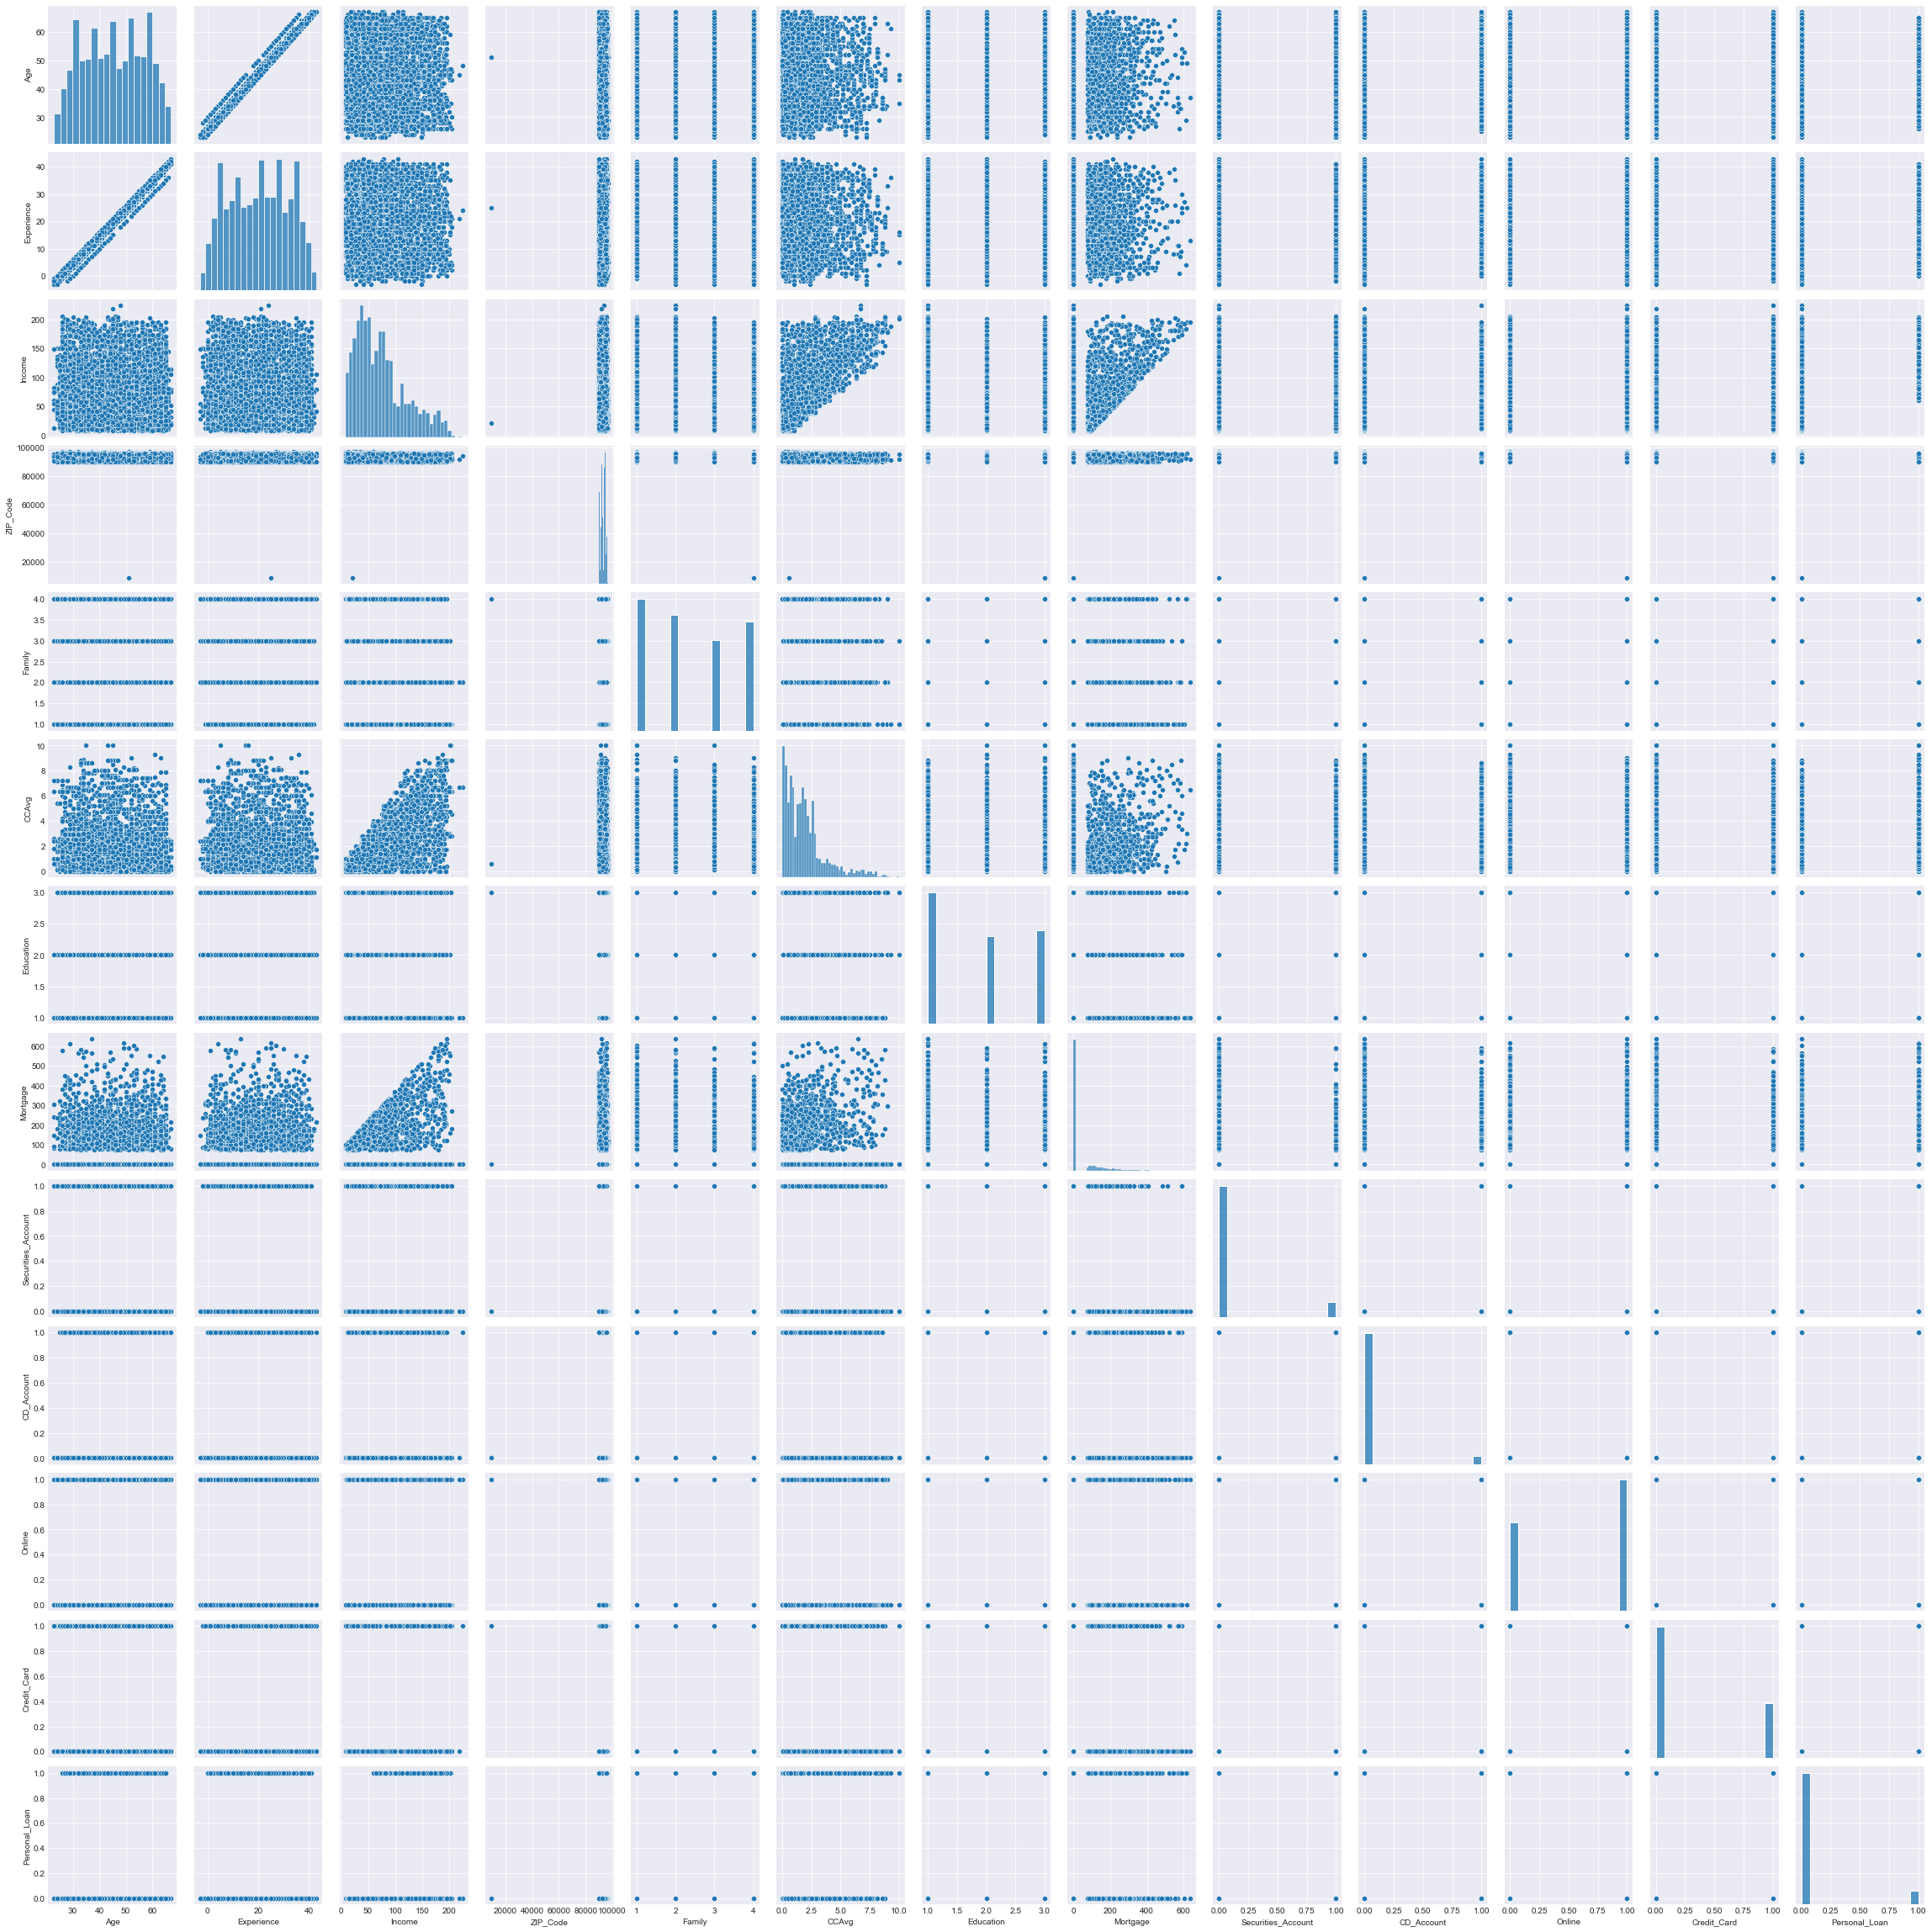

In [152]:
sns.pairplot(loan_df, vars = ['Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education',
                                'Mortgage','Securities_Account','CD_Account','Online','Credit_Card','Personal_Loan'])

# Check for Multicollinearity using VIF

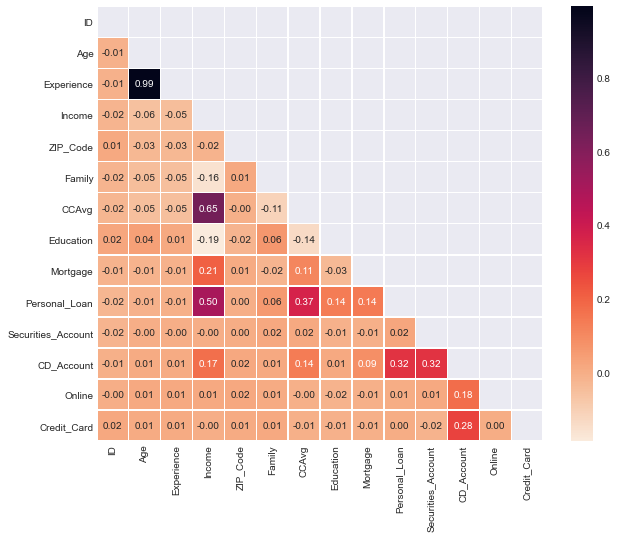

In [153]:
corr = loan_df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
dropvals = np.zeros_like(corr)
dropvals[np.triu_indices_from(dropvals)] = True
sns.heatmap(corr, cmap = 'rocket_r', linewidths = .5, annot = True, fmt = ".2f", mask = dropvals)
plt.show()


In [20]:
def calculate_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in  range(X.shape[1])]
  return(vif)

In [21]:
# set up independent variables and predict variables
y = loan_df[['Personal_Loan']]
x = loan_df.drop(['ID', 'Personal_Loan'], axis = 'columns')
x

,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,Credit_Card
0,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [22]:
# check for VIF for independent variables
calculate_vif(x)

,variables,VIF
0,Age,1274.998190
1,Experience,314.670428
2,Income,6.596099
3,ZIP_Code,365.036365
4,Family,5.539558
5,CCAvg,3.853491
6,Education,6.700572
7,Mortgage,1.375801
8,Securities_Account,1.269672
9,CD_Account,1.415026


>**Since VIF > 5 or 10 indicates high multicollinearity, which is something we don't want. Thus, we are going to delete "Age", "Experience", and "ZIP_Code", and see if that keeps the VIF score below 5.**

In [23]:
x = x.drop(['Age', 'Experience','ZIP_Code'], axis = 1)
calculate_vif(x)

,variables,VIF
0,Income,5.521059
1,Family,3.952948
2,CCAvg,3.831200
3,Education,3.982118
4,Mortgage,1.370214
5,Securities_Account,1.244540
6,CD_Account,1.357281
7,Online,2.324945
8,Credit_Card,1.501195


# Fitting Logistic Regression Model

In [24]:
# Split data with train and test sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (4000, 9)
y train data (4000, 1)
x test data  (1000, 9)
y test data  (1000, 1)


In [25]:
# fit model with train set
logit_reg = LogisticRegression()
logit_reg.fit(X_train, y_train)

# Predicting for test set
y_pred = logit_reg.predict(X_test)
logit_reg_score = logit_reg.score(X_test, y_test)
logit_reg_accuracy = accuracy_score(y_test, y_pred)
logit_reg_confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

C:\Users\Lu_ki\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lu_ki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Accuracy Score : 0.948000
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       900
           1       0.80      0.64      0.71       100

    accuracy                           0.95      1000
   macro avg       0.88      0.81      0.84      1000
weighted avg       0.94      0.95      0.95      1000


Logistic Regression Confusion Matrix : 
 [[884  16]
 [ 36  64]]

True Possitive    =  64
True Negative     =  884
False Possive     =  16
False Negative    =  36


<AxesSubplot:>

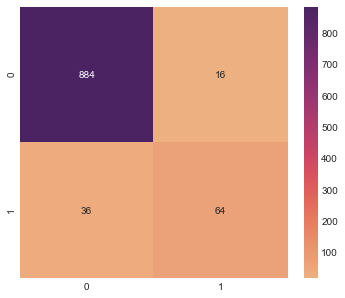

In [37]:
# Accuracy
print('Logistic Regression Model Accuracy Score : %f'  % logit_reg_accuracy)

print(classification_report(y_test,y_pred))

# Confusion Matrix
print('\nLogistic Regression Confusion Matrix : \n', logit_reg_confusion_matrix)
print('\nTrue Possitive    = ', logit_reg_confusion_matrix[1][1])
print('True Negative     = ',   logit_reg_confusion_matrix[0][0])
print('False Posstive     = ',   logit_reg_confusion_matrix[0][1])
print('False Negative    = ',   logit_reg_confusion_matrix[1][0])

# Plot heatmap for confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='',cmap='flare')

# Model Optimization

In [38]:
# define logit function formula and fit model
func = "Personal_Loan ~ Income + Family + CCAvg + Mortgage + C(Education) + C(Securities_Account) + C(CD_Account) + C(Online) + C(Credit_Card)"

logit_model = logit(func, data = loan_df)
logit_estimates = logit_model.fit()
print(logit_estimates.summary())

Optimization terminated successfully.
         Current function value: 0.117460
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4989
Method:                           MLE   Df Model:                           10
Date:                Wed, 21 Jul 2021   Pseudo R-squ.:                  0.6285
Time:                        04:18:46   Log-Likelihood:                -587.30
converged:                       True   LL-Null:                       -1581.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -13.0011      0.567    -22.915      0.000     -

>**After reviewing the results of the model above, Mortgage is not significant enough predictor, since its P-value is larger than 0.05, also its coefficient is only 0.0007. Therefore, we are going to take this predictor off from the model to optimize it.** 

In [44]:
x_opt = x.drop(['Mortgage'], axis = 1)

X_opt_train, X_opt_test, y_opt_train, y_opt_test = train_test_split(x_opt, y, test_size=0.20, random_state=1)
print('x train data {}'.format(X_opt_train.shape))
print('y train data {}'.format(y_opt_train.shape))
print('x test data  {}'.format(X_opt_test.shape))
print('y test data  {}'.format(y_opt_test.shape))

x train data (4000, 8)
y train data (4000, 1)
x test data  (1000, 8)
y test data  (1000, 1)


In [46]:
# Iteration

# fit new model with optimized train set
logit_reg_opt = LogisticRegression()
logit_reg_opt.fit(X_opt_train, y_opt_train)

# Predicting for optimized test set
y_opt_pred = logit_reg_opt.predict(X_opt_test)
logit_reg_opt_score = logit_reg_opt.score(X_opt_test, y_opt_test)
logit_reg_opt_accuracy = accuracy_score(y_opt_test, y_opt_pred)
logit_reg_opt_confusion_matrix = metrics.confusion_matrix(y_opt_test, y_opt_pred)

C:\Users\Lu_ki\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lu_ki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Optimized Logistic Regression Model Accuracy Score : 0.950000
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       900
           1       0.83      0.63      0.72       100

    accuracy                           0.95      1000
   macro avg       0.89      0.81      0.84      1000
weighted avg       0.95      0.95      0.95      1000


Logistic Regression Confusion Matrix : 
 [[887  13]
 [ 37  63]]

True Possitive    =  63
True Negative     =  887
False Possive     =  13
False Negative    =  37


<AxesSubplot:>

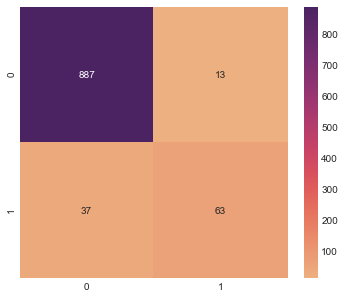

In [47]:
# Accuracy of optimized model
print('Optimized Logistic Regression Model Accuracy Score : %f'  % logit_reg_opt_accuracy)

print(classification_report(y_opt_test,y_opt_pred))

# Confusion Matrix
print('\nLogistic Regression Confusion Matrix : \n', logit_reg_opt_confusion_matrix)
print('\nTrue Possitive    = ', logit_reg_opt_confusion_matrix[1][1])
print('True Negative     = ',   logit_reg_opt_confusion_matrix[0][0])
print('False Posstive     = ',   logit_reg_opt_confusion_matrix[0][1])
print('False Negative    = ',   logit_reg_opt_confusion_matrix[1][0])

# Plot heatmap for confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_opt_test,y_opt_pred),annot=True,fmt='',cmap='flare')

>**After comparing the result of both models, we can see that all benchmarks are quite similar between the two. The optimized model is slightly more accurate (0.95) than the initial model (0.948). It particularly performs better in predicting true negtives and avoiding false positives.** 

#### Q1: What were the three most significant variables?

According to the results of the model, the three most significant variables are: Education, CD_Account (deposit account), and credit card.

#### Q2: Of those three, which had the most negative influence on loan acceptance?

Among these three, "Credit Card" had the most negative influence on loan acceptance. People with one more credit card will decrease the log odds of loan acceptance by 1.0399. 

#### Q3: How accurate was the model overall and what was the precision rate??

This model, with a accuracy rate of 95%, is doing a pretty good job in helping the bank's financial management team to device campaigns with optimized target marketing (as accurate as 95%), as well as helping to increase the success ratio by 83% (true possitive percision rate) with minimal budget.